In this technique has a cons when the model going into the production so it can generate a random value for 
a column corresponding to the same value in another column .


so you have to make sure that the random number generate for the same value is always same.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [9]:
df['imputed_age']=df['Age']

In [10]:
df.head()

,Survived,Age,Fare,imputed_age
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [12]:
# imputing the random value in imputed_age column

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=.2)

In [17]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(712, 3)
(179, 3)
(712,)
(179,)


In [19]:
df['Age'].dropna().sample(df['Age'].isnull().sum()).values

array([34.  , 18.  , 39.  , 21.  , 38.  , 44.  ,  2.  , 17.  , 25.  ,
       33.  , 39.  , 35.  , 28.  , 31.  , 39.  , 24.  , 36.  , 19.  ,
       36.  , 65.  , 35.  , 43.  , 37.  , 18.  ,  5.  , 22.  , 60.  ,
       28.  , 30.  , 44.  ,  0.83, 16.  , 45.  , 38.  , 38.  , 61.  ,
       49.  , 23.  , 19.  , 40.5 , 37.  , 30.  , 20.  , 27.  , 23.  ,
       54.  , 22.  , 20.  , 13.  , 31.  ,  6.  , 28.  , 25.  , 25.  ,
       14.  , 33.  , 29.  , 35.  ,  4.  , 40.  , 28.  , 16.  , 28.  ,
       37.  , 27.  , 23.5 , 47.  , 31.  , 24.  , 14.  ,  0.42,  2.  ,
       40.  , 20.  , 36.  , 35.  , 31.  , 22.  , 60.  , 17.  , 52.  ,
       62.  , 33.  , 38.  , 18.  , 22.  , 19.  , 27.  , 16.  , 34.  ,
       18.  , 26.  , 20.  , 18.  , 34.  , 32.  ,  1.  , 26.  , 26.  ,
       22.  , 48.  , 51.  , 20.  , 36.  ,  9.  , 33.  , 15.  , 54.  ,
       42.  , 17.  , 28.  ,  0.83, 42.  , 30.  , 29.  , 24.  , 15.  ,
       19.  , 42.  , 17.  , 50.  , 52.  , 32.  , 35.  , 21.  , 22.  ,
       25.  , 37.  ,

In [26]:
df['imputed_age'][df['imputed_age'].isnull()]=df['Age'].dropna().sample(df['imputed_age'].isnull().sum()).values

C:\Users\Asus\AppData\Local\Temp\ipykernel_9244\2746771443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imputed_age'][df['imputed_age'].isnull()]=df['Age'].dropna().sample(df['imputed_age'].isnull().sum()).values


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          714 non-null    float64
 2   Fare         891 non-null    float64
 3   imputed_age  891 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.0 KB


plotting the distplot

C:\Users\Asus\AppData\Local\Temp\ipykernel_9244\2894558195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],label='unimputed',hist=False)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages

<Axes: xlabel='imputed_age', ylabel='Density'>

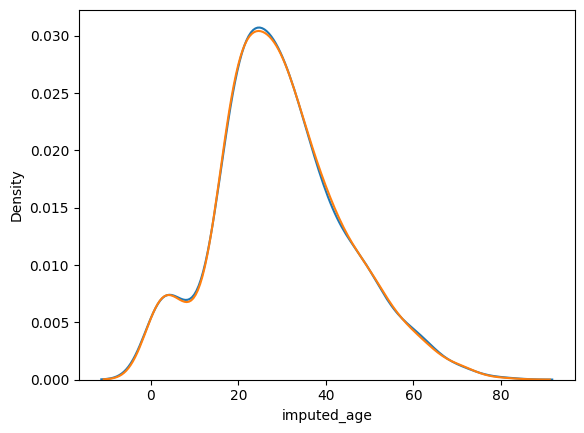

In [29]:
sns.distplot(df['Age'],label='unimputed',hist=False)
sns.distplot(df['imputed_age'],label='imputed value',hist=False)

so this is the beauty of random value imputation that the distribution is unchanged of the columns

In [33]:
print(df['Age'].var())
print(df['imputed_age'].var())

211.01912474630802
209.68816633324505


In [34]:
xtrain[['Fare','Age','imputed_age']].cov()

,Fare,Age,imputed_age
Fare,2369.751934,63.067896,63.067896
Age,63.067896,209.883201,209.883201
imputed_age,63.067896,209.883201,209.883201


So by using this technique the co variance is changed

<Axes: >

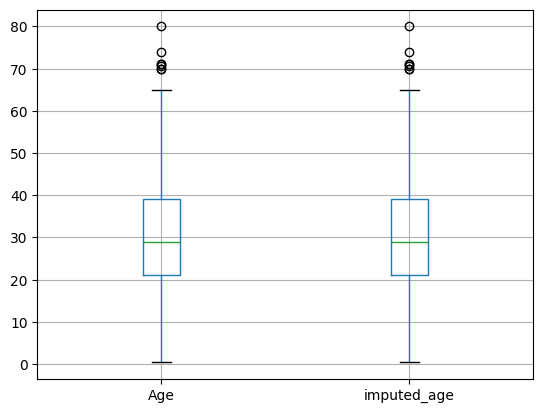

In [35]:
xtrain[['Age','imputed_age']].boxplot()

So there is no change in the outliers 

Use the below code to prevent the different random value for the same input as we discussed earlier

this ensure the only one unique random value of the same value is generated


In [ ]:
sampled_value = xtrain['Age'].dropna().sample(1, random_state=int(observation['Fare']))
